# Explainer Notebook

#### - Get all links in initial page
#### - Make dataframe with columns: [URL, Title, List references, List paragraph texts]

In [ ]:
# Options
OPTION_PERFORM_SCRAPE = False

In [41]:
# Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
from util import wiki_util
from tqdm import tqdm
from ast import literal_eval
from collections import defaultdict
import networkx as nx
from netwulf.interactive import visualize


In [ ]:
# Static Variables
LINK_WIKI_ENGLISH = "https://en.wikipedia.org/wiki/Cold_War"
LINK_WIKI_GERMAN = "https://de.wikipedia.org/wiki/Kalter_Krieg"

In [ ]:
def get_content_soup(link_wikipedia):
    website = requests.get(link_wikipedia)
    content_soup = BeautifulSoup(website.content)
    return content_soup

def soup_get_title(wiki_content_soup):
    head = wiki_content_soup.find("h1", {"id": "firstHeading"})
    return head.text

def soup_get_reference_links(wiki_content_soup, language="en"):
    p_elements = wiki_content_soup.find_all("p")
    links = [a['href'] for p in p_elements for a in p.find_all("a", href=True)]
    links = [wiki_util.hyperlink_cleanup(link, language) for link in links]
    links = [link for link in links if link != False]
    return links

def soup_get_paragraph_texts(wiki_content_soup):
    p_elements = wiki_content_soup.find_all("p")
    paragraph_texts = [p.text for p in p_elements]
    return paragraph_texts

def get_all_reference_links(link_wikipedia, language):
    website = requests.get(link_wikipedia)
    content_soup = BeautifulSoup(website.content)
    p_elements = content_soup.find_all("p")
    links = [a['href'] for p in p_elements for a in p.find_all("a", href=True)]
    links = [wiki_util.hyperlink_cleanup(link, language) for link in links]
    links = [link for link in links if link != False]
    return links


In [ ]:
# Scrape English version
if OPTION_PERFORM_SCRAPE:
    links_to_scan = get_all_reference_links(LINK_WIKI_ENGLISH, "en") + [LINK_WIKI_ENGLISH]
    links_to_scan = sorted(list(set(links_to_scan)))
    data = []
    for url in tqdm(links_to_scan):
        soup = get_content_soup(url)
        title = soup_get_title(soup)
        list_references = soup_get_reference_links(soup, language="en")
        list_paragraph_texts = soup_get_paragraph_texts(soup)
        data.append([url, title, list_references, list_paragraph_texts])


In [ ]:
# Save English version
if OPTION_PERFORM_SCRAPE:
    COLUMN_NAMES = ['URL', 'TITLE', 'LIST_REFERENCES', 'LIST_PARAGRAPH_TEXTS']
    df_wikipedia_english = pd.DataFrame(data, columns=COLUMN_NAMES)
    df_wikipedia_english = df_wikipedia_english.set_index('URL')
    df_wikipedia_english.to_csv('./data/wiki_english.csv')

In [ ]:
# Scrape German Version
if OPTION_PERFORM_SCRAPE:
    links_to_scan = get_all_reference_links(LINK_WIKI_GERMAN, language="de") + [LINK_WIKI_GERMAN]
    links_to_scan = sorted(list(set(links_to_scan)))
    data = []
    for url in tqdm(links_to_scan):
        soup = get_content_soup(url)
        title = soup_get_title(soup)
        list_references = soup_get_reference_links(soup, language="de")
        list_paragraph_texts = soup_get_paragraph_texts(soup)
        data.append([url, title, list_references, list_paragraph_texts])


In [ ]:
# Save German Version
if OPTION_PERFORM_SCRAPE:
    COLUMN_NAMES = ['URL', 'TITLE', 'LIST_REFERENCES', 'LIST_PARAGRAPH_TEXTS']
    df_wikipedia_german = pd.DataFrame(data, columns=COLUMN_NAMES)
    df_wikipedia_german = df_wikipedia_german.set_index('URL')
    df_wikipedia_german.to_csv('./data/wiki_german.csv')

In [ ]:
df_wikipedia_english_fromCSV = pd.read_csv('./data/wiki_english.csv', index_col='URL', converters={'LIST_REFERENCES': literal_eval, 'LIST_PARAGRAPH_TEXTS': literal_eval})
df_wikipedia_german_fromCSV = pd.read_csv('./data/wiki_german.csv', index_col='URL', converters={'LIST_REFERENCES': literal_eval, 'LIST_PARAGRAPH_TEXTS': literal_eval})

In [12]:
df_wikipedia_english_fromCSV

,TITLE,LIST_REFERENCES,LIST_PARAGRAPH_TEXTS
URL,,,
"https://en.wikipedia.org/wiki/1,000,000,000_(number)","1,000,000,000","[https://en.wikipedia.org/wiki/Billion, https:...","[1,000,000,000 (one billion, short scale; one ..."
https://en.wikipedia.org/wiki/17th_parallel_north,17th parallel north,[https://en.wikipedia.org/wiki/Circle_of_latit...,[The 17th parallel north is a circle of latitu...
https://en.wikipedia.org/wiki/1947_Polish_legislative_election,1947 Polish legislative election,[https://en.wikipedia.org/wiki/Edward_Os%C3%B3...,"[\n, Edward Osóbka-Morawski\nPPS\n, Józef Cyra..."
https://en.wikipedia.org/wiki/1948_Czechoslovak_coup_d%27%C3%A9tat,1948 Czechoslovak coup d'état,[https://en.wikipedia.org/wiki/Communist_Party...,"[\n, In late February 1948, the Communist Part..."
https://en.wikipedia.org/wiki/1948_Italian_general_election,1948 Italian general election,[https://en.wikipedia.org/wiki/Alcide_De_Gaspe...,"[\n, Alcide De Gasperi\nChristian Democracy\n,..."
...,...,...,...
https://en.wikipedia.org/wiki/Yasser_Arafat,Yasser Arafat,[https://en.wikipedia.org/wiki/Help:IPA/Englis...,"[\n, Mohammed Abdel Rahman Abdel Raouf Arafat ..."
https://en.wikipedia.org/wiki/Yekaterinburg,Yekaterinburg,[https://en.wikipedia.org/wiki/Help:IPA/Englis...,"[\n, Yekaterinburg (/jɪˈkætərɪnbɜːrɡ/ yih-KAT-..."
https://en.wikipedia.org/wiki/Yugoslavia,Yugoslavia,[https://en.wikipedia.org/wiki/Geographic_coor...,"[\n, Coordinates: 44°49′N 20°27′E﻿ / ﻿44.817°N..."


In [35]:
def df_get_url_list(df_wiki):
    return list(df_wiki.index)

def mask_list(base, to_mask):
    res = [o for o in to_mask if o in base]
    return res

edge_list = []

# (a, b): count
reference_count = defaultdict(lambda:0)

url_list = df_get_url_list(df_wikipedia_english_fromCSV)
for url in tqdm(url_list):
    references = df_wikipedia_english_fromCSV["LIST_REFERENCES"][url]
    #references = mask_list(url_list, references)

    for url_ref in references:
        reference_count[(url, url_ref)] += 1


100%|██████████| 857/857 [00:00<00:00, 6180.45it/s]


In [36]:
print(len(reference_count.keys()))

168072


In [38]:
for a in tqdm(url_list):
    for b in url_list:
        weight = reference_count[(a,b)]
        weight += reference_count[(b,a)]
        if weight > 0:
            if not ((a, b, weight) in edge_list or (b, a, weight) in edge_list):
                edge_list.append((a, b, weight))

100%|██████████| 857/857 [00:18<00:00, 45.34it/s] 


In [40]:
G = nx.Graph()
G.add_weighted_edges_from(edge_list)

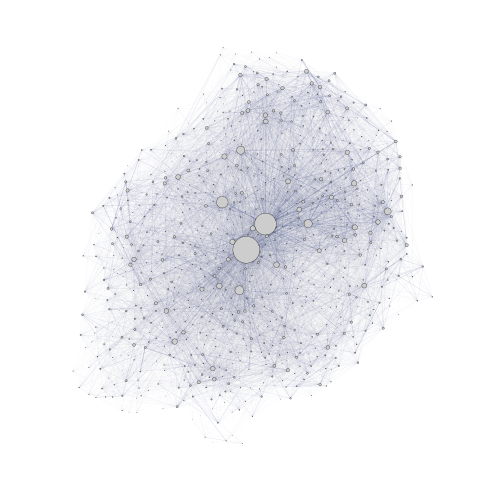

In [43]:
config = {'zoom': 0.7629787234042553,
  'node_charge': -73.39458413926499,
  'node_gravity': 0,
  'link_distance': 15.53811411992263,
  'link_distance_variation': 0.07,
  'node_collision': True,
  'wiggle_nodes': False,
  'freeze_nodes': False,
  'node_fill_color': '#cdcdcd',
  'node_stroke_color': '#000000',
  'node_label_color': '#3c3c3c',
  'display_node_labels': False,
  'scale_node_size_by_strength': True,
  'node_size': 37.13249516441006,
  'node_stroke_width': 0.6179883945841392,
  'node_size_variation': 0.9652804642166344,
  'link_color': '#303f89',
  'link_width': 2.2345967117988392,
  'link_alpha': 0.24129593810444874,
  'link_width_variation': 1.3737911025145066,
  'display_singleton_nodes': True,
  'min_link_weight_percentile': 0,
  'max_link_weight_percentile': 1}
visualize(G, config=config)
print()